In [5]:
#importing libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statistics
import numpy as np
import seaborn as sns
from scipy import stats

In [7]:
#reading the csv file
df = pd.read_excel('D:/sem4/applied biostatics/project/B21022.xlsx')
control_data = df['Control'].dropna()
diet_data = df['Diet'].dropna()

In [10]:
control_mean = np.mean(control_data)
control_median = np.median(control_data)
control_std = np.std(control_data, ddof=1) # ddof=1 for sample standard deviation
control_size = len(control_data)
diet_mean = np.mean(diet_data)
diet_median = np.median(diet_data)
diet_std = np.std(diet_data, ddof=1) # ddof=1 for sample standard deviation
diet_size = len(diet_data)

In [11]:
print(control_mean , control_median , control_std)
print(diet_mean , diet_median , diet_std)

12.201935483870969 12.24 1.2799542162510835
11.828157894736842 11.66 0.87292566558596


In [12]:
# Welch's t-test :-
t_stat, p_value = stats.ttest_ind(control_data, diet_data, equal_var=False)
# the t-statistic and p-value:-
print("Welch's t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Welch's t-test:
t-statistic: 1.3843572339580719
p-value: 0.17226293632624023


INTERPRETATIONS -

Based on the results of Welch’s t-test with a t-statistic of 1.3844 and a p-value of 0.1723, we
can draw the following inferences:

The t-statistic of 1.3844 indicates a slight difference between the mean iron levels of the control and diet groups. However, the p-value of 0.1723 is larger than the commonly used significance level of 0.05. Therefore, we do not have sufficient evidence to reject the null hypothesis and conclude that there is a significant difference in iron levels between the control and diet groups.

The direction of the difference cannot be inferred solely from the t-statistic and p-value. To determine which group has a higher mean iron level, we can compare the means directly or calculate the mean difference.

Overall, based on these results, it does not appear that the certain food diet has a significant impact on increasing the level of iron in the blood plasma compared to the control group. However, it is important to interpret the results in the context of your specific study and consider any other relevant factors or limitations.

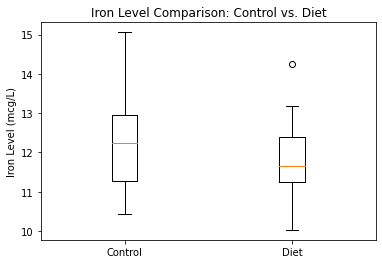

In [13]:
plt.figure()
plt.boxplot([control_data, diet_data])
plt.xticks([1, 2], ['Control', 'Diet'])
plt.ylabel('Iron Level (mcg/L)')
plt.title('Iron Level Comparison: Control vs. Diet')
plt.show()

INFERENCES:

1. Significant Difference:
The p-value of 0.1723 is greater than the chosen significance level (e.g., 0.05).
Therefore, we can conclude that there is no significant difference between the iron levels in the control
group and the diet group.

2. Reject Null Hypothesis:
Since the p-value is greater than the significance level, we cannot reject the null hypothesis. The null
hypothesis in this case would state that there is no difference in iron levels between the control and
diet groups. Larger p-value indicates strong evidence to go with this null hypothesis.

3. Diet’s Effect on Iron Levels:
The statistically insignificant difference between the control and diet groups suggests that the certain
food diet doesnot have an impact on increasing iron levels in the blood plasma. The diet is not likely contributing
to lower iron levels compared to the control group.

4. Practical Significance:
While the statistical analysis demonstrates a slight difference, it is important to consider the
practical significance as well. The effect size should be evaluated to determine the magnitude of
the difference and its practical importance.

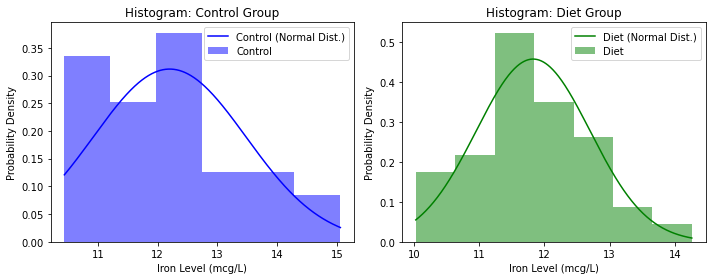

In [14]:
control_bins = np.histogram_bin_edges(control_data, bins='auto')
diet_bins = np.histogram_bin_edges(diet_data, bins='auto')
# Plotting histograms and normal distribution plots side by side
plt.figure(figsize=(10, 4)) # Adjust the figure size as needed
# Plot histogram for the control group
plt.subplot(1, 2, 1)
plt.hist(control_data, bins=control_bins, color='blue', alpha=0.5,label='Control', density=True)
plt.xlabel('Iron Level (mcg/L)')
plt.ylabel('Probability Density')
plt.title('Histogram: Control Group')
plt.legend()

# Plot normal distribution plot for the control group
x = np.linspace(control_data.min(), control_data.max(), 500)
control_mean = np.mean(control_data)
control_std = np.std(control_data, ddof=1)
control_pdf = (1 / (control_std * np.sqrt(2 * np.pi))) * np.exp(-(x - control_mean)**2 / (2 * control_std**2))
plt.plot(x, control_pdf, color='blue', label='Control (Normal Dist.)')
plt.legend()

# Plot histogram for the diet group
plt.subplot(1, 2, 2)
plt.hist(diet_data, bins=diet_bins, color='green', alpha=0.5, label='Diet',density=True)
plt.xlabel('Iron Level (mcg/L)')
plt.ylabel('Probability Density')
plt.title('Histogram: Diet Group')
plt.legend()

# Plot normal distribution plot for the diet group
x = np.linspace(diet_data.min(), diet_data.max(), 500)
diet_mean = np.mean(diet_data)
diet_std = np.std(diet_data, ddof=1)
diet_pdf = (1 / (diet_std * np.sqrt(2 * np.pi))) * np.exp(-(x - diet_mean)**2 /(2 * diet_std**2))
plt.plot(x, diet_pdf, color='green', label='Diet (Normal Dist.)')
plt.legend()
plt.tight_layout() # Adjust the spacing between subplots if needed
plt.show()

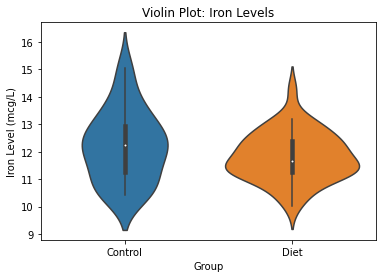

In [16]:
# Combine the control and diet data into a single DataFrame
data = pd.DataFrame({'Group': ['Control'] * len(control_data) + ['Diet'] *len(diet_data),
'Iron Level': np.concatenate([control_data, diet_data])})
# Plot violin plot
sns.violinplot(x='Group', y='Iron Level', data=data)
plt.xlabel('Group')
plt.ylabel('Iron Level (mcg/L)')
plt.title('Violin Plot: Iron Levels')
plt.show()

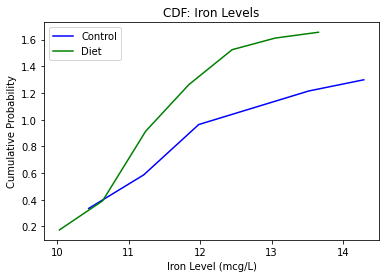

In [18]:
# Calculate the CDF values for the control and diet data
control_cdf = np.cumsum(np.histogram(control_data, bins='auto',density=True)[0])
diet_cdf = np.cumsum(np.histogram(diet_data, bins='auto', density=True)[0])
# Plot CDF
plt.plot(control_bins[:-1], control_cdf, color='blue', label='Control')
plt.plot(diet_bins[:-1], diet_cdf, color='green', label='Diet')
plt.xlabel('Iron Level (mcg/L)')
plt.ylabel('Cumulative Probability')
plt.title('CDF: Iron Levels')
plt.legend()
plt.show()